In [1]:
import numpy as np
import mdtraj as md
from matplotlib import pyplot as plt

## Phi and Psi dihedrals calculatioin by numpy

In [2]:
# Plot traj A
def plot_prop_vs_time(prop, time, legend):
    plt.scatter(time, prop, label=legend, alpha=0.5)
    plt.xlabel('Time (ps)')
    plt.ylabel('Angle (radians)')
    plt.legend(loc='upper right')

Text(0, 0.5, 'psi dihedral')

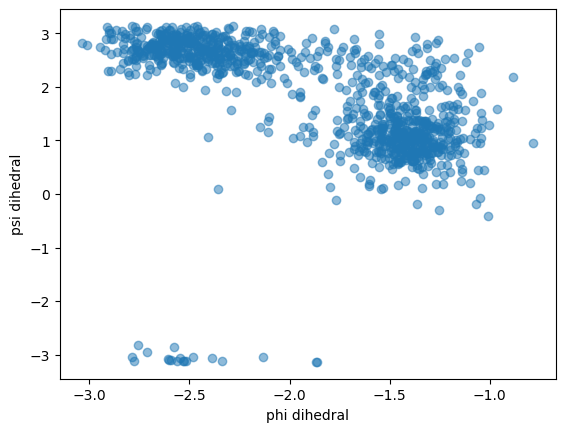

In [9]:
colvar_a = np.loadtxt('../Data/COLVAR_A', comments='#')
plt.scatter(colvar_a[:, 1], colvar_a[:, 2], alpha=0.5)
plt.xlabel('phi dihedral')
plt.ylabel('psi dihedral')

Text(0, 0.5, 'psi dihedral')

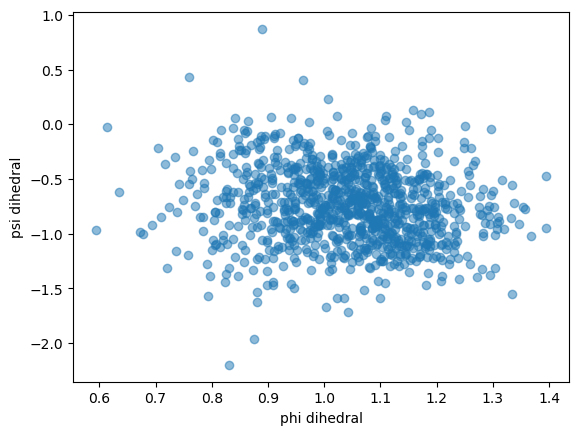

In [10]:
colvar_b = np.loadtxt('../Data/COLVAR_B', comments='#')
plt.scatter(colvar_b[:, 1], colvar_b[:, 2], alpha=0.5)
plt.xlabel('phi dihedral')
plt.ylabel('psi dihedral')

## Phi and Psi dihedrals calculation by mdtraj

Text(0, 0.5, 'psi dihedral')

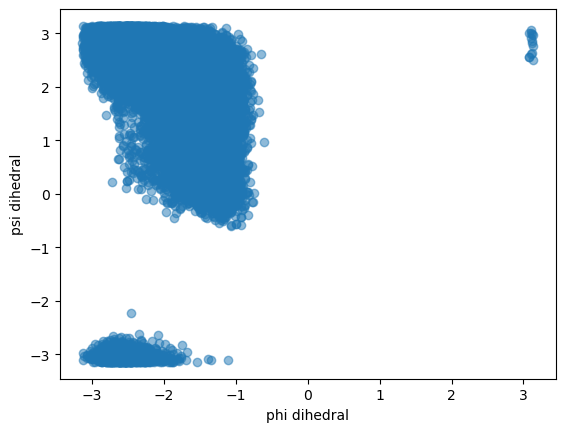

In [12]:
traj = md.load('../Data/md_A.xtc', top='../Inputs/dialaA.pdb')

phi_indices, phi_angles_a = md.compute_phi(traj)
psi_indices, psi_angles_a = md.compute_psi(traj)

plt.scatter(phi_angles_a, psi_angles_a, alpha=0.5)
plt.xlabel('phi dihedral')
plt.ylabel('psi dihedral')

Text(0, 0.5, 'psi dihedral')

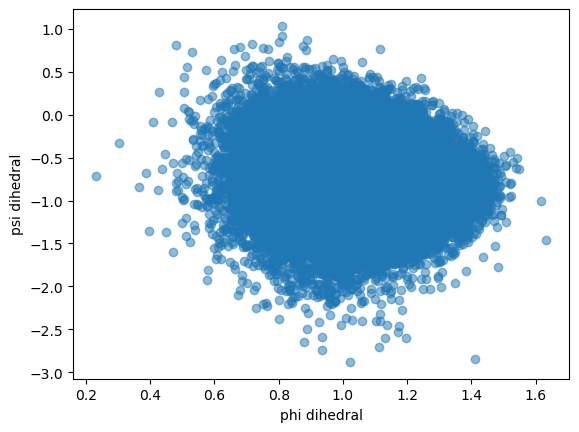

In [13]:
traj = md.load('../Data/md_B.xtc', top='../Inputs/dialaB.pdb')

phi_indices, phi_angles_b = md.compute_phi(traj)
psi_indices, psi_angles_b = md.compute_psi(traj)

plt.scatter(phi_angles_b, psi_angles_b, alpha=0.5)
plt.xlabel('phi dihedral')
plt.ylabel('psi dihedral')

In [15]:
# calculate standard deviation of phi and psi angles from COLVAR file
phi_std_a = np.std(colvar_a[:, 1])
psi_std_a = np.std(colvar_a[:, 2])
phi_std_b = np.std(colvar_b[:, 1])
psi_std_b = np.std(colvar_b[:, 2])
print('Standard deviation of phi angles for traj A: ', phi_std_a)
print('Standard deviation of psi angles for traj A: ', psi_std_a)
print('Standard deviation of phi angles for traj B: ', phi_std_b)
print('Standard deviation of psi angles for traj B: ', psi_std_b)

Standard deviation of phi angles for traj A:  0.557186774975366
Standard deviation of psi angles for traj A:  1.0876533251639369
Standard deviation of phi angles for traj B:  0.1305311669747325
Standard deviation of psi angles for traj B:  0.3503741047536096


In [14]:
# calculate standard deviation of phi and psi angles from traj xtc file
phi_std_a = np.std(phi_angles_a)
psi_std_a = np.std(psi_angles_a)
print('Standard deviation of phi angles for traj A: ', phi_std_a)
print('Standard deviation of psi angles for traj A: ', psi_std_a)
phi_std_b = np.std(phi_angles_b)
psi_std_b = np.std(psi_angles_b)
print('Standard deviation of phi angles for traj B: ', phi_std_b)
print('Standard deviation of psi angles for traj B: ', psi_std_b)

Standard deviation of phi angles for traj A:  0.5538316
Standard deviation of psi angles for traj A:  1.024898
Standard deviation of phi angles for traj B:  0.13238177
Standard deviation of psi angles for traj B:  0.34453443
